In [1]:
import os
import sys

if not "SimpleHTR/src" in sys.path:
    sys.path.append("SimpleHTR/src")
if not "WordSegmentation/src" in sys.path:
    sys.path.append("WordSegmentation/src")

In [2]:
import matplotlib.pyplot as plt

import cv2
from WordSegmentation import wordSegmentation, prepareImg

import sys
import argparse
import cv2
import editdistance
from DataLoader import DataLoader, Batch
from Model import Model, DecoderType
from SamplePreprocessor import preprocess

class FilePaths:
    "filenames and paths to data"
    fnCharList = 'SimpleHTR/model/charList.txt'
    fnAccuracy = 'SimpleHTR/model/accuracy.txt'
    fnTrain = 'SimpleHTR/data/'
    fnInfer = 'SimpleHTR/data/test.png'
    fnCorpus = 'SimpleHTR/data/corpus.txt'

/home/system-gru/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
decoderType = DecoderType.WordBeamSearch
model = Model(open(FilePaths.fnCharList).read(), decoderType, mustRestore=True)

Instructions for updating:
dim is deprecated, use axis instead
Python: 3.6.5 |Anaconda custom (64-bit)| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Tensorflow: 1.13.0-dev20181028
Init with stored values from SimpleHTR/model/snapshot-38
INFO:tensorflow:Restoring parameters from SimpleHTR/model/snapshot-38


In [4]:
data_path = "WordSegmentation/data"
imgFiles = os.listdir(data_path)

In [5]:
def line_to_words(img):
    img = prepareImg(img, 50)
    res = wordSegmentation(img, kernelSize=25, sigma=11, theta=7, minArea=100)
    
    return res

def word_to_text(img):
    processed_img = preprocess(img, Model.imgSize)
    batch = Batch(None, [processed_img])
    (recognized, probability) = model.inferBatch(batch, True)
    
    return (recognized, probability)

In [6]:
predictText = []

for (i,f) in enumerate(imgFiles):
    img = cv2.imread(data_path + '/' + f)
    res = line_to_words(img)
    
    s_text = []
    for(j, w) in enumerate(res):
        (wordBox, wordImg) = w
        (recognized, probability) = word_to_text(wordImg)
        
        s_text.append((recognized, probability))
        
    predictText.append(s_text)

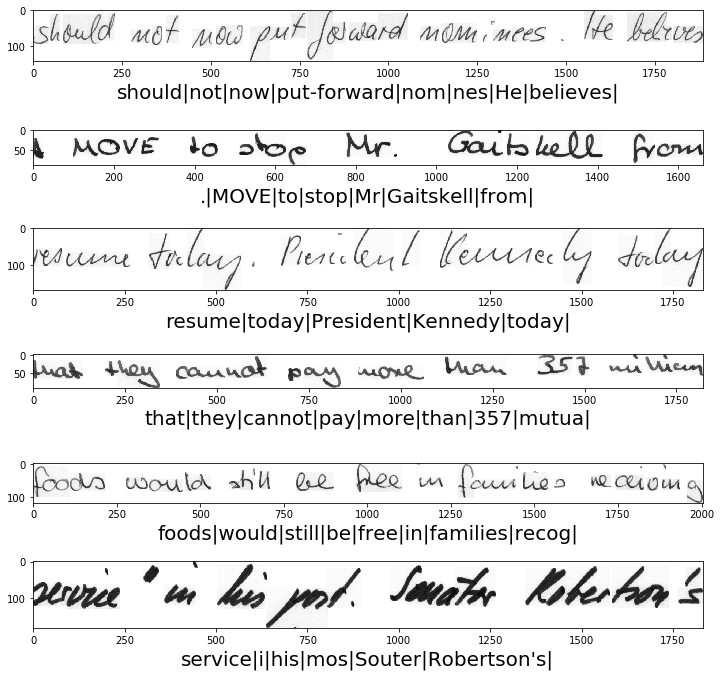

In [10]:
cols = 1
rows = len(imgFiles)

plt.figure(figsize=(12,12))
for (i,f) in enumerate(imgFiles):
    img = cv2.imread(data_path + '/' + f)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    
    c_text = ""
    for (j,t) in enumerate(predictText[i]):
        (recognized, probability) = t
        c_text += recognized[0] + "|"
    
    plt.xlabel(c_text, fontsize=20)